This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

50,000 highly polarized reviews

25,000 reviews for training and 25,000 reviews for testing

Each set consisting of 50% negative and 50% positive reviews

In [1]:
imdb.load_data?

Object `imdb.load_data` not found.


In [2]:
#loading the IMDB Dataset to read the data
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000) 
#num_words parameter means that we're gonna use 10000 most commonly used words in movie reviews

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
#check the number of training dataset
len(train_data)
#we have 25000 obs°

25000

In [ ]:
#first data of training is q sequence of numbers. To each number corresponds a word
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
#label for the 1st obs°, it can either be 1 for positive or 0 negativ e review
train_labels[0]

1

In [7]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
#list compression detailed explanations
[i*2 for i in range(3)] #i is inside list 3 which is iterating from 0, 1 and 2 and output i*2

In [ ]:
#let's see the word index data:  correspondance entre nombres et mots
word_index

In [ ]:
#it's joining strings, when it does it fill blank betw/ them. If we want to connect them with dash then we can write "-".join()
" ".join(["a", "B", "c"])

'a B c'

In [ ]:
#let's see the first 5 numbers of the training data
train_data[0][:5]

[1, 14, 22, 16, 43]

In [ ]:
#using the return of the train_data[0][:5] we can match the number with word
reverse_word_index.get(14-3, "?")

'this'

In [8]:
#we decode the first review
word_index = imdb.get_word_index() #word_index is a dictionnary maping words to an integrer index
reverse_word_index = dict( #reverse_word_index is also a dictionnary mapping integrer indices to words (inverse of word_index)
    [(value, key) for (key, value) in word_index.items()]) #list compression that changes the position of key and value
decoded_review = " ".join( #Note that the indices are offset by 3 because 0,1?2 are reserved indices for "padding", "start of sequence", "unknown"
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) #list compression

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
#this shows the text decoded of the first review
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
len(train_data[0])

218

In [ ]:
len(train_data[1])
#the lenghts are all differents
#we need the same lenghtsize to provide

189

In [ ]:
train_data[1][:6] #train_data[i][j]

[1, 194, 1153, 194, 8255, 78]

In [9]:
#process the data
#encoding the integer sequences via multi-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000): #we create a matrix size sequences * 10000
    results = np.zeros((len(sequences), dimension)) #creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences): 
        for j in sequence: 
            results[i, j] = 1. #sets specific indices of results[i] to 1s
    return results
x_train = vectorize_sequences(train_data) #vectorized training data
x_test = vectorize_sequences(test_data) #vectorized test data

In [ ]:
#check the first sequence
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
#Vectorize labels change the type to float. 
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000] #we prepare validation set for x with the first 10000 obs°
partial_x_train = x_train[10000:] #we use the rest of the data (after 10000) for the training
y_val = y_train[:10000] #we prepare validation set for y
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
#with .fit we train our model 

Epoch 1/20
30/30 [==============================] - 5s 44ms/step - loss: 0.5093 - accuracy: 0.7889 - val_loss: 0.3789 - val_accuracy: 0.8754
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3010 - accuracy: 0.9072 - val_loss: 0.3034 - val_accuracy: 0.8861
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2217 - accuracy: 0.9292 - val_loss: 0.3313 - val_accuracy: 0.8620
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1759 - accuracy: 0.9433 - val_loss: 0.2779 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1431 - accuracy: 0.9551 - val_loss: 0.2782 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1196 - accuracy: 0.9625 - val_loss: 0.2916 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0984 - accuracy: 0.9713 - val_loss: 0.3187 - val_accuracy: 0.8823
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys() #4keys loss/accuracy/val/loss/valaccuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_dict['loss'] #sequence of training losses

[0.5092660784721375,
 0.30098462104797363,
 0.221715047955513,
 0.17589770257472992,
 0.14311638474464417,
 0.11958036571741104,
 0.09844432771205902,
 0.08041917532682419,
 0.06766583025455475,
 0.05458958446979523,
 0.044217243790626526,
 0.03851546347141266,
 0.029982050880789757,
 0.023398004472255707,
 0.018809229135513306,
 0.01724792830646038,
 0.009862441569566727,
 0.010321027599275112,
 0.005861641373485327,
 0.008609001524746418]

**Plotting the training and validation loss**

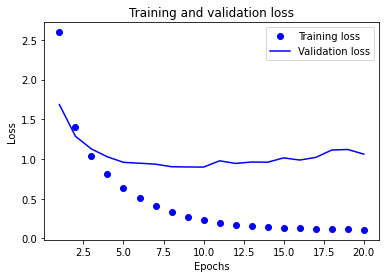

In [23]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"] #value we plot
val_loss_values = history_dict["val_loss"] #value we plot
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") #"bo" is for "blue dot"
plt.plot(epochs, val_loss_values, "b", label="Validation loss") #"b" is for "solid blue line"
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

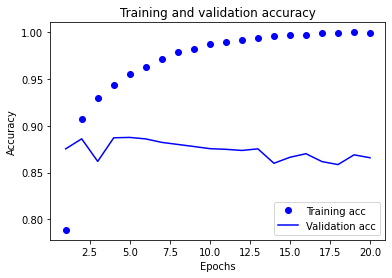

In [ ]:
plt.clf() #clears the figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512) #we fit our model again using number of epoch 4.  
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4511 - accuracy: 0.8249
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2542 - accuracy: 0.9102
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1950 - accuracy: 0.9295
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3001 - accuracy: 0.8825


In [ ]:
results #the first number, 0.29 is the test loss and the second number 0.88 is the test accuracy

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test) #new data entre parenthèses. 

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

Dataset for text classification (46 different topics)
8982 training and 2246 test examples

**Loading the Reuters dataset**

In [4]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

In [ ]:
len(test_data)

In [ ]:
train_data[10]

**Decoding newswires back to text**

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]]) #note that the indices are offset by 3 because 0,1,2 are reserved indices for 'padding' 'start of sequence' and 'unknown'

565248/550378 [==============================] - 0s 0us/step


In [ ]:
train_labels[10]

### Preparing the data

**Encoding the input data**

In [10]:
x_train = vectorize_sequences(train_data) #vectorized training data 
x_test = vectorize_sequences(test_data) #vectorized test data

**Encoding the labels**

In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels) #vectorized training labels
y_test = to_one_hot(test_labels) #vectorized test labels

Can be done using built in function: to_categorical()

In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [16]:
from tensorflow.keras import layers

In [17]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [18]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

For binary classification we use sigmoid sith single dense ouput layer.

If we use Dense layer with output 2 natural extension should be the softmax activation.

Softmax f° is for multiclass classification

### Validating your approach

**Setting aside a validation set**

In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 34ms/step - loss: 2.5957 - accuracy: 0.5311 - val_loss: 1.6850 - val_accuracy: 0.6450
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.3991 - accuracy: 0.7062 - val_loss: 1.2862 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0403 - accuracy: 0.7798 - val_loss: 1.1262 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8091 - accuracy: 0.8279 - val_loss: 1.0276 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6366 - accuracy: 0.8649 - val_loss: 0.9583 - val_accuracy: 0.8090
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5037 - accuracy: 0.8946 - val_loss: 0.9471 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4038 - accuracy: 0.9164 - val_loss: 0.9353 - val_accuracy: 0.8050
Epoch 8/20
16

**Plotting the training and validation loss**

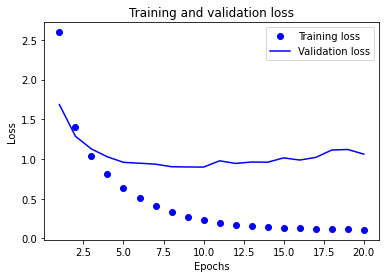

In [24]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

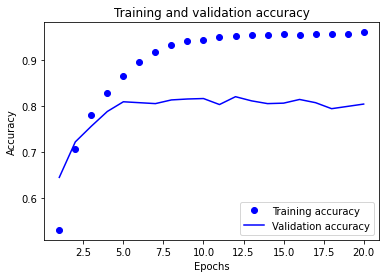

In [25]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

the model begins to overfit after nine epochs

**Retraining a model from scratch**

In [26]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.6659 - accuracy: 0.5254
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.3820 - accuracy: 0.7219
Epoch 3/9
18/18 [==============================] - 0s 15ms/step - loss: 1.0144 - accuracy: 0.7896
Epoch 4/9
18/18 [==============================] - 0s 15ms/step - loss: 0.7965 - accuracy: 0.8342
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6308 - accuracy: 0.8707
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5066 - accuracy: 0.8966
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4098 - accuracy: 0.9143
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3341 - accuracy: 0.9271
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9766 - accuracy: 0.7890


In [27]:
results

[0.9766417145729065, 0.7889581322669983]

In [28]:
#Result from random guess
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19590382902938558

A random classifier would score around 19% classification accuracy, so
the results of our model seem pretty good in that light.

### Generating predictions on new data

In [29]:
predictions = model.predict(x_test)

In [30]:
#each entry in 'predictions' is a vector of length 46
predictions[0].shape

(46,)

In [31]:
#the coefficients in this vector sum to 1 as the model use softmax
np.sum(predictions[0])

1.0

In [32]:
#the largest entry is the predicted class
np.argmax(predictions[0])

4

### A different way to handle the labels and the loss

Another way to encode the labels would be to cast them as an integer tensor, like this:

In [33]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

The only thing this approach would change is the choice of the loss function, categorical_crossentropy -> sparse_categorical_crossentropy

In [34]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [35]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 2.8873 - accuracy: 0.3622 - val_loss: 2.3266 - val_accuracy: 0.4180
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 2.0226 - accuracy: 0.4610 - val_loss: 1.8620 - val_accuracy: 0.5690
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 1.5398 - accuracy: 0.6282 - val_loss: 1.5423 - val_accuracy: 0.6160
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 1.2966 - accuracy: 0.6660 - val_loss: 1.4421 - val_accuracy: 0.6610
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1236 - accuracy: 0.7271 - val_loss: 1.3766 - val_accuracy: 0.6800
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9965 - accuracy: 0.7531 - val_loss: 1.3590 - val_accuracy: 0.6880
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8993 - accuracy: 0.7729 - val_loss: 1.3694 - val_accuracy: 0.6990
Epoch 8/20
63/63 [=

The model now peaks at ~71% validation accuracy, an 8% absolute drop.

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

404 training samples and 102 test samples with 13 features

**Loading the Boston housing dataset**

In [36]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [37]:
train_data.shape

(404, 13)

In [38]:
test_data.shape

(102, 13)

In [39]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [40]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [41]:
def build_model():
    model = keras.Sequential([ #because we need to instantiate the same model multiple times we use a function to construct it
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [42]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] #prepare the valdata: data from partition #k
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate( #prepare the training data: data from all other partitions
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model() #build the keras model
    model.fit(partial_train_data, partial_train_targets, #train the model (in silent mode, verbose=0)
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) #evaluate the model on valdata
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [43]:
all_scores

[2.00105357170105, 2.4867897033691406, 2.5682761669158936, 2.4168877601623535]

In [44]:
np.mean(all_scores)

2.3682518005371094

Let’s try training the model a bit longer: 500 epochs. To keep a record of how well the model does at each epoch, we’ll modify the training loop to save the per epoch validation score log for each fold

**Saving the validation logs at each fold**

In [45]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [46]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

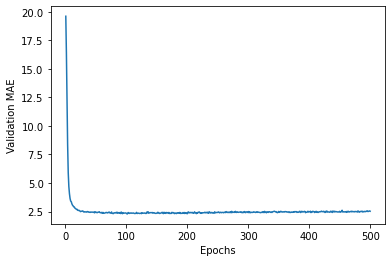

In [47]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

It may be a little difficult to read the plot, due to a scaling issue. Let’s omit the first 10 data points.

**Plotting validation scores, excluding the first 10 data points**

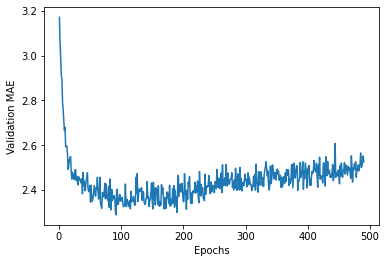

In [48]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

Validation MAE stops improving
significantly after 120–140 epochs

**Training the final model**

In [49]:
model = build_model() #get a fresh compiled model
model.fit(train_data, train_targets, #train it on the entirety of the data
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 16.1336 - mae: 2.7703


In [50]:
test_mae_score

2.770265579223633

### Generating predictions on new data

In [51]:
predictions = model.predict(test_data)
predictions[0]

array([8.389742], dtype=float32)

### Wrapping up

## Summary